In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
a_renomear = {
    "expected_hours": "horas_esperadas",
    "price": "preco",
    "unfinished": "nao_finalizado",
}
dados = dados.rename(columns=a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
troca = {0: 1, 1: 0}
dados["finalizado"] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

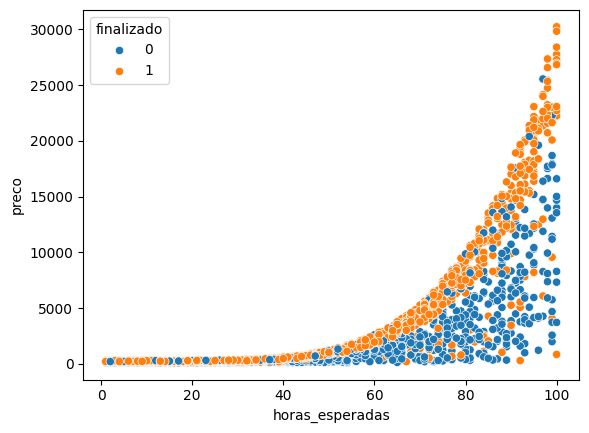

In [4]:
import seaborn as sns 
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

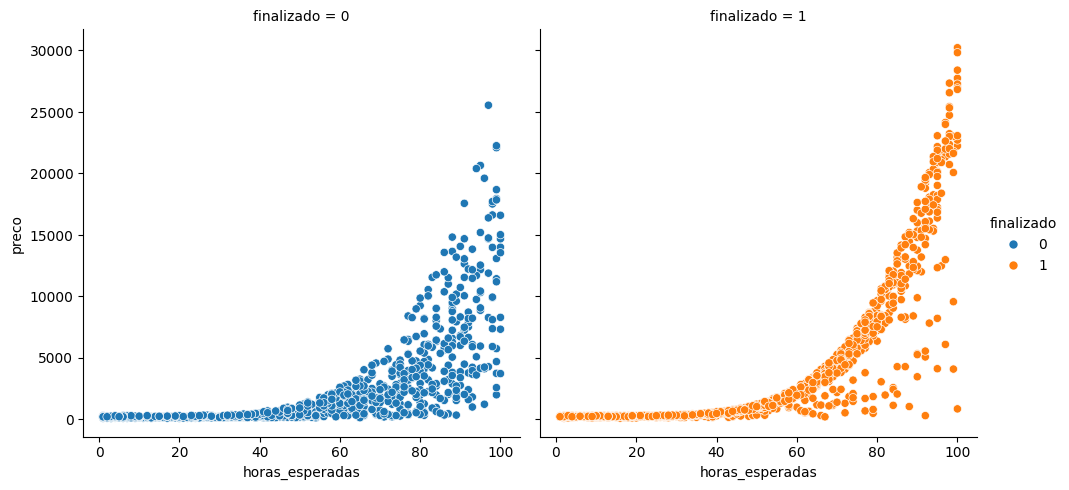

In [5]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=dados)

In [6]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed = (SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(
    x, y, test_size=0.25, stratify=y
)

print(
    "Treinaremos com %d elementos e trestaremos com %d elementos"
    % (len(treino_x), len(teste_x))
)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e trestaremos com 540 elementos
A acurácia foi 57.78%


In [8]:
import numpy as np

previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

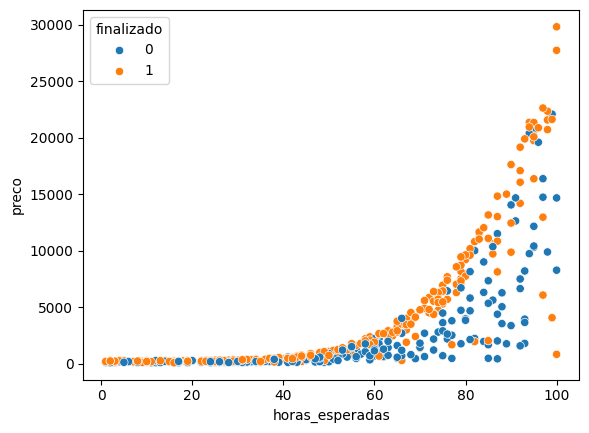

In [9]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [10]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 29820


In [11]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [12]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.00000e+00, 1.00000e+02],
       [1.99000e+00, 1.00000e+02],
       [2.98000e+00, 1.00000e+02],
       ...,
       [9.70300e+01, 2.95228e+04],
       [9.80200e+01, 2.95228e+04],
       [9.90100e+01, 2.95228e+04]])

In [13]:
Z = modelo.predict(pontos)
Z= Z.reshape(xx.shape)
print(Z.ndim)

2


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


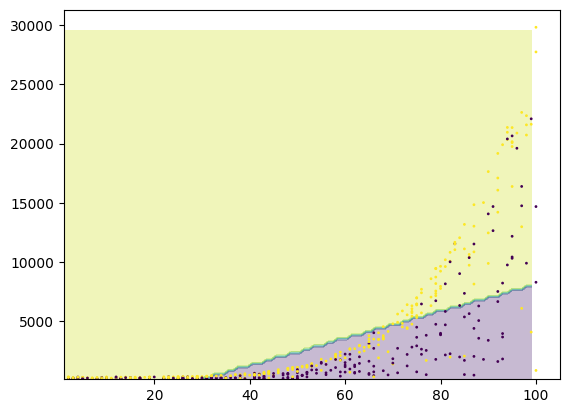

In [14]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


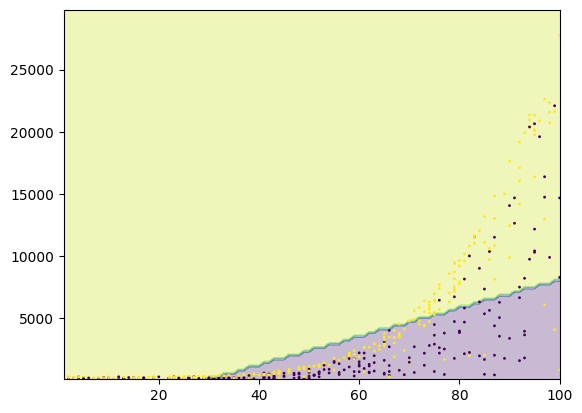

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os limites dos eixos x e y
x_min, x_max = teste_x.horas_esperadas.min(), teste_x.horas_esperadas.max()
y_min, y_max = teste_x.preco.min(), teste_x.preco.max()

# Definindo a resolução dos eixos
pixels = 100
eixo_x = np.linspace(x_min, x_max, pixels)
eixo_y = np.linspace(y_min, y_max, pixels)

# Criando uma grade de pontos (meshgrid)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# Fazendo previsões para cada ponto da grade
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

# Plotando o gráfico de contorno
plt.contourf(xx, yy, Z, alpha=0.3)

# Plotando os pontos de teste
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# Exibindo o gráfico
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed = SEED

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(
    x, y, test_size=0.25, stratify=y
)

print(
    "Treinaremos com %d elementos e trestaremos com %d elementos"
    % (len(treino_x), len(teste_x))
)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e trestaremos com 540 elementos
A acurácia foi 60.37%


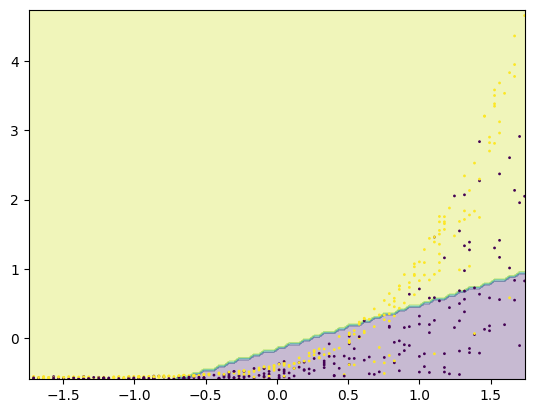

In [17]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

# Definindo os limites dos eixos x e y
x_min, x_max = data_x.min(), data_x.max()
y_min, y_max = data_y.min(), data_y.max()

# Definindo a resolução dos eixos
pixels = 100
eixo_x = np.linspace(x_min, x_max, pixels)
eixo_y = np.linspace(y_min, y_max, pixels)

# Criando uma grade de pontos (meshgrid)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# Fazendo previsões para cada ponto da grade
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

# Plotando o gráfico de contorno
plt.contourf(xx, yy, Z, alpha=0.3)

# Plotando os pontos de teste
plt.scatter(data_x, data_y, c=teste_y, s=1)

# Exibindo o gráfico
plt.show()
